In [1]:
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
# constants #

ki = 1.2e-06 # 1/s
kp = 500 # L/mol*s
ktc = 6e06 # L/mol*s
ktd = 6e06 # L/mol*s
kfm = 9.1e-02 # L/mol*s
kfp = 0.5 # L/mol*s
kpp = 0.05 # L/mol*s
f = 1.0
M0 = 8.43 # mol/L
I0 = 0.001 #mol/L

In [3]:
def lambda_0(I): # moment zero for radicals
    return np.sqrt((2 * f * ki * I) / ktd)

def lambda_1(M, L0, mu_1, mu_2): # momento one for radicals
    num = kp * M * L0 + kfp * L0 * mu_2
    denm = kfm * M + ktd * L0 + kfp * mu_1
    
    return num / denm

(400,)

In [38]:
# Crear un array de 400 valores para n
n1 = np.arange(1, 11) * 10
n2 = np.arange(11, 51) * 150
n3 = np.arange(51, 401) * 2500  # Va de 1*2500 a 400*2500
n = np.concatenate((n1, n2, n3))

# Crear un array con 400 elementos para b
b = np.diff(n)
b = np.append(b, 2500)

In [40]:
# Función principal
def balances_KR(t, y):
    # Descomposición del vector de estados
    I = y[0]
    M = y[1]
    mu_0 = y[2]
    mu_1 = y[3]
    mu_2 = y[4]
    Nrd = y[5:405]  # Radicales
    Npd = y[405:805]  # Polímeros

    # Cálculo de momentos de los radicales
    L0 = lambda_0(I)
    L1 = lambda_1(M, L0, mu_1, mu_2)

    # Ecuaciones diferenciales
    dIdt = -ki * I
    dMdt = -(kp + kfm) * M * L0
    dmu_0dt = kfm * M * L0 + ktd * L0**2
    dmu_1dt = kp * M * L0
    dmu_2dt = kp * M * (L0 + 2 * L1)

    # Ecuaciones para los radicales y polímeros
    dNrdt = np.zeros_like(Nrd)
    dNpdt = np.zeros_like(Npd)

    for idx in range(len(Nrd)):
        if idx == 0:
            dNrdt[idx] = (- (kfm * M + ktd * L0 + kfp * mu_1) * Nrd[idx]
                          - kp * M * (b[idx] * Nrd[idx])
                          + kfp * L0 * n[idx] * Npd[idx]
                          + kfm * M * L0 + 2 * f * ki * I)
        else:
            dNrdt[idx] = (- (kfm * M + ktd * L0 + kfp * mu_1) * Nrd[idx]
                          + kp * M * (b[idx-1] * Nrd[idx-1] - b[idx] * Nrd[idx])
                          + kfp * L0 * n[idx] * Npd[idx])

    for idx in range(len(Npd)):
        dNpdt[idx] = (- kfp * L0 * n[idx] * Npd[idx]
                      + (kfm * M + ktd * L0 + kfp * mu_1) * Nrd[idx])

    # Concatenación de derivadas
    return np.concatenate(([dIdt, dMdt, dmu_0dt, dmu_1dt, dmu_2dt], dNrdt, dNpdt))

In [41]:
y0 = np.zeros(805)
y0[0] = I0
y0[1] = M0

time = [0, 400000]

In [42]:
sol = solve_ivp(
      balances_KR,
      time, 
      y0, 
      method='LSODA',
      rtol=1e-06,
      atol=1e-09
      )

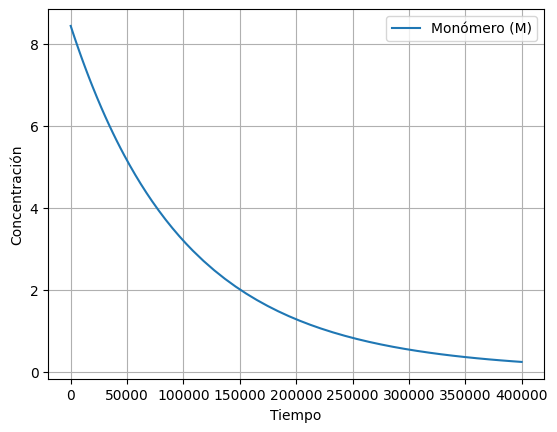

In [43]:
# Visualización
import matplotlib.pyplot as plt

#plt.plot(sol.t, sol.y[0], label="Iniciador (I)")
plt.plot(sol.t, sol.y[1], label="Monómero (M)")
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Concentración")
plt.grid()
plt.show()

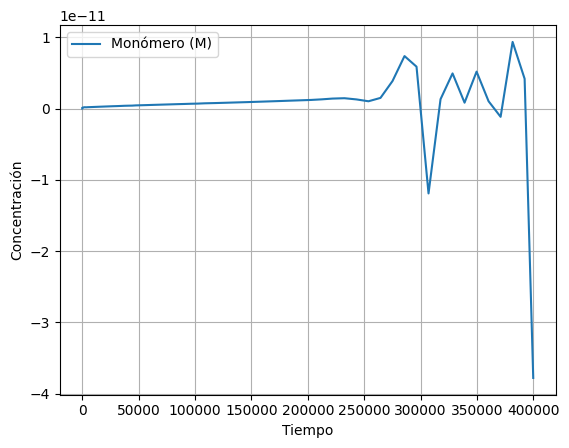

In [44]:
#plt.plot(sol.t, sol.y[0], label="Iniciador (I)")
plt.plot(sol.t, sol.y[750], label="Monómero (M)")
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Concentración")
plt.grid()
plt.show()

In [10]:
sol.t

array([0.00000000e+00, 1.24820643e-06, 2.49641286e-06, 1.24845607e-02,
       2.49666251e-02, 3.74486894e-02, 1.62269333e-01, 2.87089976e-01,
       4.11910619e-01, 5.47913532e-01, 6.83916446e-01, 8.19919359e-01,
       9.81566431e-01, 1.14321350e+00, 1.30486058e+00, 1.52832109e+00,
       1.75178161e+00, 1.97524213e+00, 2.19870196e+00, 2.42216180e+00,
       2.64562163e+00, 2.94091977e+00, 3.23621791e+00, 3.53151605e+00,
       3.90253277e+00, 6.03588475e+00, 8.16923673e+00, 1.03025887e+01,
       1.57878415e+01, 2.12730943e+01, 2.67583471e+01, 5.84655337e+01,
       9.01727202e+01, 1.21879907e+02, 1.90764320e+02, 2.59648733e+02,
       3.28533145e+02, 3.97417558e+02, 6.09729098e+02, 8.22040637e+02,
       1.03435218e+03, 1.24666372e+03, 1.84006265e+03, 2.43346158e+03,
       3.02686052e+03, 3.62025945e+03, 4.21365838e+03, 5.29407324e+03,
       6.37448810e+03, 7.45490296e+03, 8.53531782e+03, 9.61573268e+03,
       1.13695759e+04, 1.31234190e+04, 1.48772622e+04, 1.66311054e+04,
      

In [11]:
(8.4-3.2)/8.4

0.6190476190476191

In [12]:
sol.t.shape

(139,)

0.9617509698164646

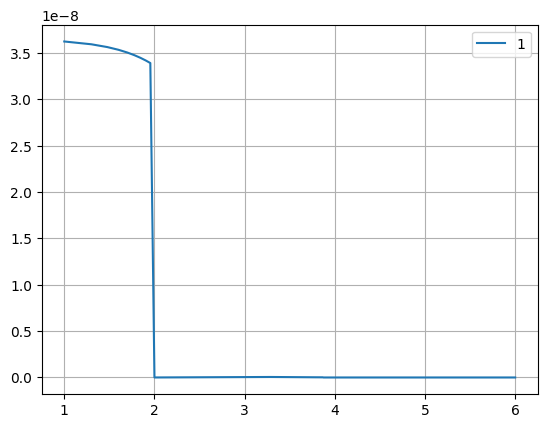

In [47]:
nlog = np.log10(n)
pn1 = sol.y[405:805, 100]/b

pn1n = np.multiply(pn1, n)

plt.plot(nlog, pn1, label='1')
#plt.plot(nlog, pn2, label='2')
#plt.plot(nlog, pn3, label='3')
plt.grid()
plt.legend()

sol.y[1][100]


1.49520759404548e-05

In [ ]:
n[370]

927500